# 철판 제조 공정 데이터를 활용한 분류모형 생성 및 성능 비교

# 주제 : 모델로 제조 공정의 불량 여부 예측하기
---

## 데이터 소개
**Kaggle의 Steel Plates Faults 데이터셋을 사용**

**컬럼 설명**

**[종속변수]**

- 종속변수 (7개) - 어떠한 불량이 나타났는지를 의미 (불량의 종류)

- Pastry, Z_Scratch, K_Scatch(데이터 자체에 오타), Stains, Dirtiness, Bumps, Other_Faults

**[설명변수]**
- 설명변수 (27개) - 철판의 길이, 반짝이는 정도, 두께, 타입 등 등 다양한 변수들을 가집니다.

- 첫번째 칼럼 X_Minimum ~ 27번째 칼럼 SigmoidOfAreas 총 28개

- 데이터출처: https://www.kaggle.com/mahsateimourikia/faults-nna/notebooks
- 컬럼 설명 : http://archive.ics.uci.edu/ml/datasets/steel+plates+faults

**[제조 공정 데이터 도메인 지식]**

- 제조 공정 데이터의 목적은 주로 **불량율**을 예측하여 불량의 원인을 제거하거나, **재고**를 예측해 수요에 맞는 적시 생산으로 창고비용(물품 보관비용) 최소화를 하는것이 주 목적인 경우가 많다.

- 여타 데이터와는 달리 데이터를 얻는 경로가 자동화된 센서 등을 통한 경우가 많아 데이터 퀄리티가 상대적으로 높고, 결측치가 적은 편이다.

# Step 1. 데이터 셋 준비

In [101]:
import pandas as pd
import numpy as np
import os

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

Kaggle API 로 데이터 불러오기 및 셋팅


In [102]:
# 다운로드 패키지
import opendatasets as od

# os 명령 관련 패키지
import os

In [103]:
#username = ######


#user key = ######

od.download("https://www.kaggle.com/mahsateimourikia/faults-nna")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gabesoon
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 102k/102k [00:00<00:00, 4.35MB/s]

In [104]:
# 다운로드 받은 파일 확인
os.listdir()

['.ipynb_checkpoints', 'faults-nna', '[분류] 패턴 인식을 통한 철판 제조 공정 불량률 예측 모델.ipynb']

In [105]:
df = pd.read_csv("faults-nna/Faults.NNA",  delimiter='\t', header=None)

print(df.shape)
df.head()

(1941, 34)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [106]:
# 컬럼명이 따로 지정되어 있지 않음
# 별도 제작한 컬럼 레이블 파일을 불러와서 입력
col_name=pd.read_csv("faults-nna/Faults_Columns",  delimiter=' ', header=None)
df.columns=col_name[0]

In [107]:
# 칼럼명이 제대로 지정이 되었는지 확인

print(df.shape) #(1941, 34)로 동일
df.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [108]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], dtype='object', name=0)

# Step 2. 데이터 전처리 및 EDA

## 전처리
---

전처리 전 데이터 형태 확인하여 전처리 필요한 내용 확인

In [109]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 종속 변수 범주화
---

- 종속 변수들인 Pastry ~ Other_Faults 를 보면 min : 0 , max :1 인 ont_hot encoding이 되어있는 상태

- 해당 데이터를 boolean 형태로 변경하여 list에 담은 뒤 (1), 범주화(2) 를 진행할 것.

### (1) - boolean Seris로 이루어진 list 구성
---

- 각 label 별 1,0으로 된 데이터를 bool 형태로 바꾼다
- bool형태로 바꾼 값을 conditions 라는 list안에 컬럼별로 담는다.

In [110]:
## pandas.Series.astype과 map, lambda를 활용
# 1) conditions_std에 각 변수들의 Seris로 list를 구성
# 2)conditions_std을 사용하고 map, lambda를 활용하여 conditions_std의 각 원소에 astype 함수를 적용

conditions_std=[
              df['Pastry'],
            df['Z_Scratch'],
            df['K_Scatch'],
            df['Stains'],
            df['Dirtiness'],
            df['Bumps'],
            df['Other_Faults'] 
                                ]

# labda 인수 i는 list 각각의 원소를 의미
# map 함수로 각 원소에 astype(bool)를 적용
conditions= list(map(lambda i: i.astype(bool), conditions_std))

In [111]:
# 잘 진행되었는지 확인
print(conditions)

[0        True
1        True
2        True
3        True
4        True
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Pastry, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Z_Scratch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: K_Scatch, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Stains, Length: 1941, dtype: bool, 0       False
1       False
2       False
3       False
4       False
        ...  
1936    False
1937    False
1938    False
1939    False
1940    False
Name: Dirtiness, Length: 1941, dtype: bool, 0       False
1 

In [112]:
print(type(conditions)) #conditions의 type

print(type(conditions[0])) # conditions 하나의 원소의 type

print(len(conditions)) # conditions list의 길이 -> 7개의 labels를 합친거이므로 7개여야 한다.

print(len(conditions[0])) #conditions list 내 각 원소의 길이 -> 각 labels의 길이가 1941이었으므로 1941개이어야 한다.

<class 'list'>
<class 'pandas.core.series.Series'>
7
1941


### 종속변수 범주화 (2) - numpy.select를 활용한 범주화
---
- 범주화 시 범주명은 각 종속변수의 칼럼명사용
- **select 함수는 list 각 원소별로 TRUE인 것들의 값을 지정한다.**
- 범주화하여 기존 데이터프레임에 새로운 칼럼 'type'로 저장

In [113]:
options = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [114]:
# conditions 의 원소(결함 종류 컬럼들)가 options와 동일한 명칭일때 True이면, 해당 명칭을 입력
# 즉, conditions list에서 첫번째 원소인 Pastry가 True인 값이 options의 Pastry에 매칭되면, 해당 데이터는 Pastry라고 입력되는 방식
# 결론적으로 각 결함 원인별로 True인 값은 해당 결함의 이름이 입력되는 것

df['defect_type']=np.select(conditions,options)

In [115]:
# 아래와 같이 defect_type 칼럼이 생성되고 범주화 된 것을 확인할 수 있습니다.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,defect_type
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


## EDA

### 결측치 확인 - isnull()

In [116]:
df.isnull().sum()

0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
defect_type              0
dtype: int64

모든 데이터에서 결측치가 발견되지 않았다.

---

### 기술통계량 - describe()

- min과 25% Quantile, max와 75% Quantile을 비교해 이상치 존재가능성에 대해서 파악 가능
- mean과 50% Quantile을 비교하여 분포의 치우침 정도를 파악
- 범주형 변수에 대해서는 정보가 제한적



- pandas.Series.value_counts를 활용해 범주화한 종속변수의 기술통계량 파악
 - 어떠한 불량타입이 많이 분포하고 적게 분포하는지 파악 가능
 - 적게 분포하는 불량타입의 경우는 예측모형을 구축하는 것이 상대적으로 어려움

In [117]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


범주형 데이터의 기술 통계량 파악

In [118]:
df['defect_type'].value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: defect_type, dtype: int64

- Stains 나 Dirtiness의 경우 데이터의 수가 작다.
- 이 경우 예측 모델을 생성했을때 두 결함 종류에 대한 판단이 정확하지 않을 가능성이 있다.
- 비슷한 데이터를 묶어서 함께 판별하도록 하거나, 아예 제외하고 모델을 생성하는 것이 전체적인 모델 성능을 더 높이는데 도움이 될 수도 있다.

- 혹은, 오버샘플링을 통해 이 문제를 극복할 수 도 있을 것이다.

### 연속형 변수 시각화 (변수간 상관관계 파악) - scatter plot

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

각 label 별로 plot 에 나타낼 색 지정

In [120]:
# dictionary 형태로 label 별 색 1:1로 지정
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}

In [121]:
# 지정된 색의 값을 가져오도록 지정하여 color_list에 담기
# get함수를 활용해 defect_type 컬럼의 값을 하나씩 가져와서 i에 할당
# 각 i에 해당하는 value값이 color_list에 입력된다.

color_list = [color_code.get(i) for i in df.loc[:,'defect_type']] 

array([[<AxesSubplot:xlabel='X_Minimum', ylabel='X_Minimum'>,
        <AxesSubplot:xlabel='X_Maximum', ylabel='X_Minimum'>,
        <AxesSubplot:xlabel='Y_Minimum', ylabel='X_Minimum'>, ...,
        <AxesSubplot:xlabel='Dirtiness', ylabel='X_Minimum'>,
        <AxesSubplot:xlabel='Bumps', ylabel='X_Minimum'>,
        <AxesSubplot:xlabel='Other_Faults', ylabel='X_Minimum'>],
       [<AxesSubplot:xlabel='X_Minimum', ylabel='X_Maximum'>,
        <AxesSubplot:xlabel='X_Maximum', ylabel='X_Maximum'>,
        <AxesSubplot:xlabel='Y_Minimum', ylabel='X_Maximum'>, ...,
        <AxesSubplot:xlabel='Dirtiness', ylabel='X_Maximum'>,
        <AxesSubplot:xlabel='Bumps', ylabel='X_Maximum'>,
        <AxesSubplot:xlabel='Other_Faults', ylabel='X_Maximum'>],
       [<AxesSubplot:xlabel='X_Minimum', ylabel='Y_Minimum'>,
        <AxesSubplot:xlabel='X_Maximum', ylabel='Y_Minimum'>,
        <AxesSubplot:xlabel='Y_Minimum', ylabel='Y_Minimum'>, ...,
        <AxesSubplot:xlabel='Dirtiness', ylabel='Y_Mini

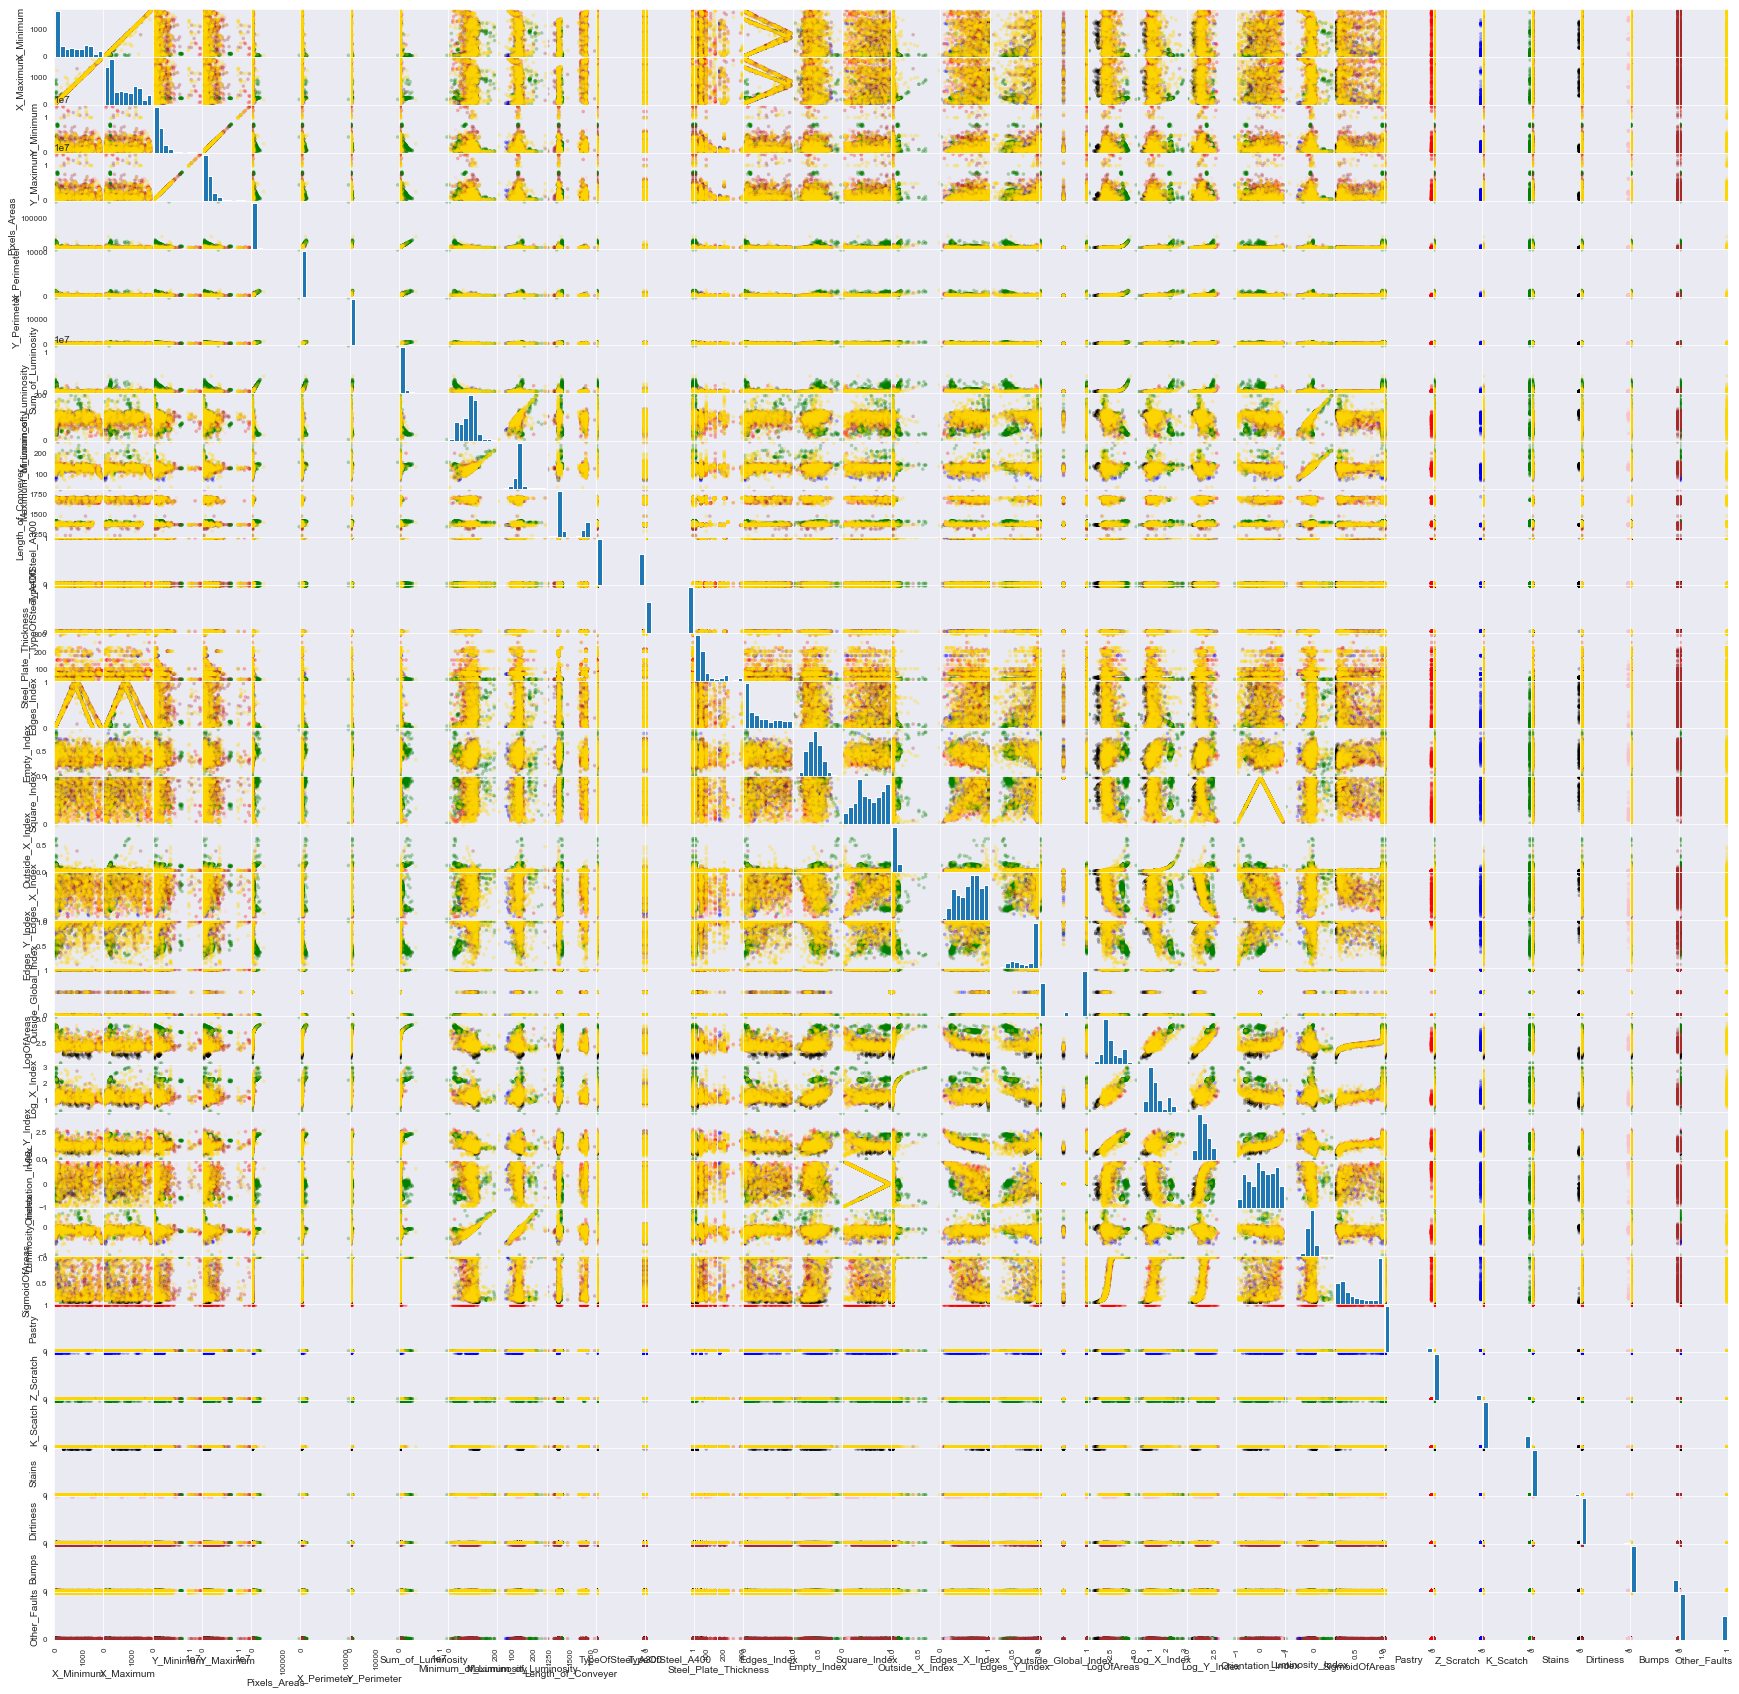

In [122]:
# pandas.plotting.scatter_matrix를 통해 모든 변수간 scatter plot을 하나의 plot에 그린다.

# df에서 범주형 변수인 defect_type를 제외하고 입력
# 색상은 지정한 color로 지정 : 각 데이터별로 해당 하는 결함의 색으로 출력된다.
# scatter plot 대칭점에는 hist plot을 그려서 데이터 분포를 표시
pd.plotting.scatter_matrix(df.loc[:,df.columns!='defect_type'], c=color_list, figsize= [30,30], alpha=0.3,s = 50, diagonal='hist')

- 데이터들간에 선형관계가 있는지 파악 가능: 선형관계에 있는 변수들은 둘중 하나만 선택해서 사용한다.
- 히스토그램으로 각 변수 조합별 데이터가 어디에 분포해 있는지 파악 가능
- 범주구분에 유용한 변수 조합을 파악 가능 : 색이 명확하게 구분이 되는 변수 조합의 경우들
---
- 하지만 columns이 너무 많은 탓에 catter_matrix 로 표현한 값에서 모든 데이터를 세세하게 파악하기는 어렵다.

### 범주형 변수의 분포 시각화 - factor plot을 활용해 변수별 count 시각화

In [123]:
import seaborn as sns

# 시각화 style 설정
sns.set_style("dark")

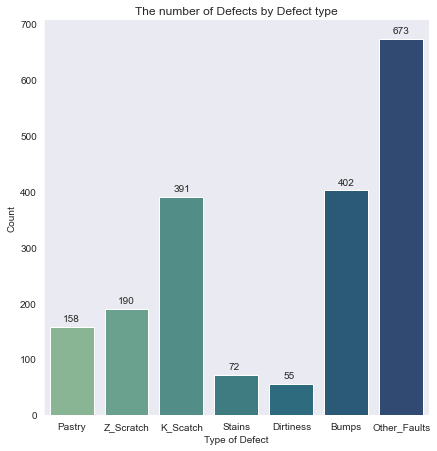

In [124]:
# seaborn.factorilot을 활용하여 Barilot으로 "defect_tyie" 변수의 카운트를 표현

g=sns.factorplot(x='defect_type',data=df, kind='count',palette='crest',size=6)

# x축 라벨 지정
g.ax.xaxis.set_label_text("Type of Defect")

# y축 라벨 지정
g.ax.yaxis.set_label_text("Count")

# Title 지정
g.ax.set_title("The number of Defects by Defect type")

# 각 bar마다 count 수치 입력해주기
# g.ax.patches : 각 bar의 값
# bar의 height값을 찾아서 , (x,y) 좌표에 annotate (주석닭기)
for i in g.ax.patches:
  g.ax.annotate((i.get_height()),(i.get_x()+0.25,i.get_height()+10))

- 가장 결함이 많은 데이터는 Other_Faults (6종류 결함 외에 모든 값)
- 명시된 유형중 가장 많은 결함은 Bumps, 2번째로 많은 것은 K_Scatch 이다.
- 위에서value_counts 에서 본것과 같이 Stains 나 Dirtiness의 경우 데이터의 수가 작아서 분석을 위한 조정이 필요할 수도 있다.

### 상관계수를 활용한 변수간의 상관관계 파악 - correlation plot

In [125]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults', 'defect_type'], dtype='object', name=0)

In [126]:
# label 값을 제외한 feature 컬럼 지정

df_cor = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]


In [127]:
# 상관계수 구하기
corr=df_cor.corr()
corr

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,,,,,,,,,,,,,,,,,,,,,,,,,,,
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797


In [128]:
## correlation plot 
def cor(df):  
    # plot size 설정 
    f, ax = plt.subplots(figsize=(20,20))

    # upper matrix
    matrix = np.triu(df.corr())

    # palette 
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(df.corr(),
                    annot=True,  #실제값 표시
                    annot_kws={"size": 7}, #실제값 크기
                    fmt ='.1g', #실제값 소수점 수 지정
                    linewidths=5, # 경계면 간격 설정 (커질수록 구분 쉬움)
                    center = 0, vmin=-1, vmax=1, #컬러바 범위 -1 ~ 1
                    cmap = colormap, 
                    cbar = True, # 컬러바 표시 여부
                    cbar_kws= {"shrink": 0.5} ,  # 0.5 : 컬러바 크기 반으로 줄임
                    square = True, 
                    mask = matrix) # 표시하지 않을 부분 지정
    plt.show()
    #plt.savefig('correlation_plot.png')

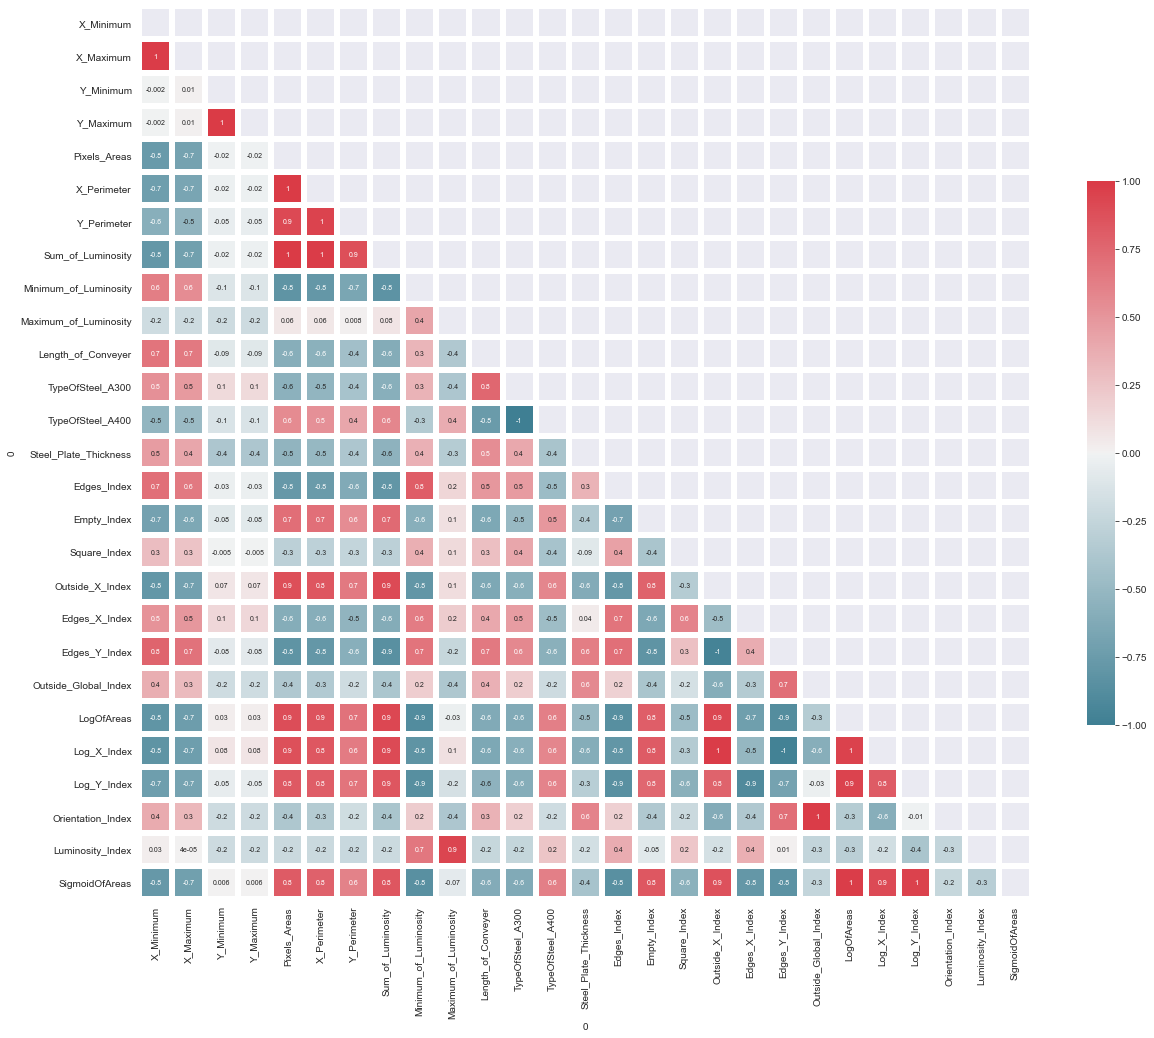

In [129]:
cor(corr)

### 추가 전처리

#### Training, Test set 분리하기

In [130]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

y = df['K_Scatch']

In [131]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [132]:
# 학습 / 테스트용 데이터 분리 (8:2)
# stratify : 지정한 Data의 비율을 유지 // 여기서는 y값의 비율이 동일하도록 지정

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

#### 데이터 표준화

In [133]:
x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [134]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-1.213233e-16,-2.146050e-19,-1.881370e-17,-2.560953e-17,-1.001490e-17,-4.138299e-17,1.087667e-17,-2.353501e-17,2.148911e-16,-6.466584e-16,4.962382e-16,3.161847e-17,4.141876e-17,7.825928e-17,-1.226467e-16,6.717135e-17,-3.912964e-17,1.362384e-16,-2.306288e-16,-2.947242e-17,2.742651e-16,1.005782e-16,-1.280476e-17,1.645305e-17,4.921607e-17,1.347719e-16
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.103367e+00,-1.241076e+00,-9.104613e-01,-9.104788e-01,-3.483794e-01,-3.406371e-01,-1.767603e-01,-3.893515e-01,-2.643140e+00,-5.071400e+00,-1.605681e+00,-8.211077e-01,-6.967596e-01,-1.123421e+00,-3.018160e+00,-2.080335e+00,-5.289097e-01,-2.468152e+00,-3.280170e+00,-1.185811e+00,-2.774003e+00,-2.156377e+00,-3.067242e+00,-2.143465e+00,-5.839974e+00,-1.367353e+00
25%,-9.883000e-01,-8.621817e-01,-6.562362e-01,-6.562372e-01,-3.333730e-01,-3.004833e-01,-1.514077e-01,-3.719521e-01,-6.554519e-01,-3.480654e-01,-7.021989e-01,-8.211077e-01,-6.967596e-01,-9.210483e-01,-7.168723e-01,-7.749740e-01,-4.443167e-01,-7.982123e-01,-9.250766e-01,-1.185811e+00,-7.146692e-01,-6.985005e-01,-6.999318e-01,-8.252854e-01,-4.361607e-01,-9.978418e-01
50%,-2.637179e-01,-2.988794e-01,-2.545875e-01,-2.546108e-01,-3.171771e-01,-2.665069e-01,-1.260551e-01,-3.538504e-01,1.675751e-01,-1.851918e-01,-6.608181e-01,-8.211077e-01,-1.413845e-01,-3.492791e-01,-1.981697e-02,-2.493327e-02,-3.870920e-01,1.006070e-01,5.824951e-01,8.913658e-01,-3.182921e-01,-3.312158e-01,-1.668921e-01,2.490715e-02,-1.325061e-02,-2.443915e-01
75%,9.307593e-01,9.199295e-01,2.919470e-01,2.919292e-01,-2.027537e-01,-8.967550e-02,-1.144025e-02,-2.343737e-01,6.567327e-01,5.205939e-01,1.311669e+00,1.217867e+00,4.374056e-02,8.284349e-01,6.595150e-01,9.383813e-01,-1.623398e-01,7.575785e-01,7.858832e-01,8.913658e-01,5.254920e-01,3.829141e-01,7.329140e-01,8.448359e-01,4.324923e-01,1.226000e+00
max,2.180122e+00,2.203231e+00,6.155444e+00,6.155404e+00,2.758779e+01,3.192762e+01,3.817116e+01,2.140560e+01,3.661558e+00,6.601209e+00,2.304809e+00,1.217867e+00,4.116492e+00,2.211034e+00,3.880404e+00,1.563140e+00,1.397465e+01,1.578793e+00,7.858832e-01,8.913658e-01,3.420237e+00,3.627366e+00,6.274553e+00,1.830314e+00,5.180199e+00,1.226589e+00


---
- mean이 0에 가까운 값으로 변했다.
- std도 1이 되었다.
- 표준화가 잘 진행되었음을 확인할 수 있다.

# Step 3. 불량율 예측 모델 생성 및 평가

## 공통 사용 함수들 생성

### 모델 활용을 위한 사양 설정

In [135]:
#Cpu의 개수를 확인 : 작업할때 cpu 를 최대한 활용하기 위해 사양 check 
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)

The number of cpus:  6


In [136]:
# 일반적으로 보유한 cpu의 2배정도의 thread를 보유하고 있다
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

Expected number of threads: 12


### 최적의 파라미터 값 및 정확도 (Accuracy) 출력하는 함수 생성

In [137]:
def get_best_parms(best_parms):
    print('best params', best_parms.best_params_)   
    print('best score', best_parms.best_score_)

### 평가 결과 출력 함수 생성

In [138]:
def get_eval(best_parm):
    
    #예측값 뽑아내기
    predicted=best_parm.predict(x_test)
    
    #교차 행렬 출력
    sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap='Reds', annot_kws={"size":30}, fmt='d')
    plt.xlabel('Predict', fontsize=20)
    plt.ylabel('Actual', fontsize=20)
    plt.title('< Confusion Matrix >', fontsize=20)
    plt.show()
    
    #평가지표 출력
    print("\n", metrics.classification_report(y_test,predicted))
    print("\n Accuracy:", best_parm.score(x_test,y_test))
    
    # 정확도 출력 with bold 
    import sys
    from termcolor import colored, cprint
    cprint(f'\n{"최적화된 모델의 예측 결과 정확도는 약 "}', attrs=['bold'], end='')
    cprint(f'{round(best_parm.score(x_test,y_test),2)*100}', attrs=['bold'], end='')
    #cprint(f'{int(best_parm.score(x_test,y_test)*100)}', attrs=['bold'], end='')
    cprint('% 이다.', attrs=['bold'], end='')

### 모델별 comparison table 함수 생성

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# 평가 지표 dict형태로 지정
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_model = GSLR
dtr_model = GSDT
svc_model = GS_SVM
rfc_model = GSRF
ann_model = GS_NN2
xgb_model = GS_xgb2
lgbm_model= GS_lgbm

# Define the models evaluation function
def models_evaluation(X, y):
    
    '''
    X : data set features
    y : data set target
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = GSLR
    dtr = GSDT
    svc = GS_SVM
    rfc = GSRF
    svc = cross_validate(svc_model, X, y, cv=10, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=10, scoring=scoring)
    
    gnb = cross_validate(gnb_model, X, y, cv=10, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                        
                                     'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(df_data, df_target, 5)

In [248]:
GS_lgbm

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      objecve='binary', random_state=None,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=12,
             param_grid={'colsample_byt

## Logistic Regression(분류 모형)

### 로지스틱 기본 모형 생성

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [142]:
# solver는 'liblinear'로 설정
# liblinear는  Ridge(L2), Lasso(L1) 에 모두 적용가능한 solrver 이다.
# 즉, 추후 패널티 부여를 통한 변화 결과를 비교하기 위해서는 동일 solver를 사용해야 한다.

lm=LogisticRegression(solver='liblinear')

### Grid Search 구축 (Ridge, Lasso Penalty / Threshold)

In [143]:
# Penalty의 형태 (Ridge, Lasso), regularization parameter range를 설정 => dictionary 형태로 저장
# C값(정규화값)이 클수록 제한을 많이 가하는 것
# tol(허용오차, Treshold) : 모델이 어느정도 수준에서 만족하고 멈출지 지정
# e.g) 값이 작으면 모델에서 출력되는 값의 변화가 거의 없을때 멈춤, 값이 크면 변화 폭이 줄어들면 멈춤
# 1e-4(10의 -4승) 

parameters={'penalty':['l1','l2'],'C':[0.01,0.1,0.5,0.9,1,5,10],'tol':[1e-4,1e-2,1,1e2]}

In [144]:
# cv : cross validation : 몇번을 교차 검증할 것인지
# n_jobs : 몇개의 cpu core를 사용할지 (보유 성능 대비 최대 값에 가까울수록 연산 속도가 빠르다.)

GSLR=GridSearchCV(lm,parameters,cv=10, n_jobs=n_thread, scoring="accuracy")

In [145]:
# Grid Search 적용하여 데이터 학습
GSLR.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=12,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [146]:
get_best_parms(GSLR)

best params {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
best score 0.9722911497105045


- C값이 1이면서 Ridge 규제를 적용하고, 모델의 결과값을 0.0001 단위로 촘촘하게 추출할때 최적의 값을 찾을 수 있다.
- 그리고 그 결과(모델의 정확도)는 약 97%이다.

### 모형 평가 및 최적 로지스틱 모형 구축

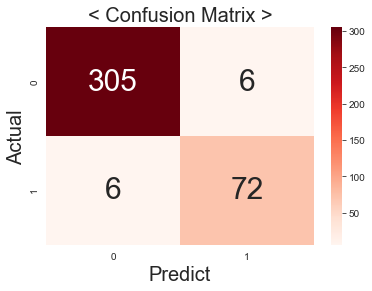


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.92      0.92      0.92        78

    accuracy                           0.97       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.97      0.97      0.97       389


 Accuracy: 0.9691516709511568

최적화된 모델의 예측 결과 정확도는 약 97.0% 이다.

In [148]:
get_eval(GSLR)

- Precision과 Recall은 정확도를 측정하는 관점이 서로 다르다.
- 때문에 어느 하나가 높다고 무조건 좋은 결과라 할 수 없다.
- 이 둘을 모두 고려한 값이 f1-score 이다. (Precision & Recall의 조화평균)

## 의사결정나무 모형(Decision Tree)
---

- 의사결정나무는 sample들을 한 곳으로 몰아서 집중시키는 과정이다.
- 즉, label인 0은 0끼리, 1은 1끼리 한쪽으로 몰리도록 sample 을 계속 나누면서 선택하는 과정을 반복한다.

### 의사결정나무 기본 모형 생성

In [149]:
# 의사결정나무 패키지 불러오기
from sklearn.tree import DecisionTreeClassifier

In [150]:
# 의사결정나무 모형 생성
dt=DecisionTreeClassifier()

### Grid Search 구축 (Loss function / Prunning)

In [151]:
#의사결정나무에서 고려해야할 criterion, min_samples_split, max_depth, min_samples_leaf, max_features 등을 고려하여 Grid search를 수행합니다.
# criterion : 분할 품질을 측정는 기능 (경험적으로 둘 차이에 큰 차이는 없음)
# min_samples_split : node 분할하기 위한 최소한의 샘플 수, 작게 설정할 수록 과적합 가능성 up(노드가 너무 많아져서)
# min_samples_leaf : 말단 node(leaf)가 되는 최소한의 샘플 수, min_samples_split 처럼 과적합 제어 용도, 비대칭적 자료는 값을 작게 하는 것이 좋다.
# max_depth : 트리의 최대 깊이 , 깊어질수록 min_samples_split 설정대로 최대분할 하여 과적합 가능성 높아짐
# max_features : 최적의 분할을 위해 고려할 feature의 개수 , sqrt는 전체 feature 개수를 루트한 값, log2는 로그를 씌운 값을 의미


parameters={'criterion':['gini','entropy'],'min_samples_split':[2,5,10,15], 
            'max_depth':[None,2],'min_samples_leaf':[1,3,10,15],'max_features':[None,'sqrt','log2']}

In [152]:
GSDT=GridSearchCV(dt,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GSDT.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [153]:
get_best_parms(GSDT)

best params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
best score 0.979383788254756


- entrypy 로 분할된 tree의 품질을 측정해야 한다.
- 트리의 최대 깊이(max_depth)는 None으로 완벽하게 분류를 해낼때까지 깊이를 계속 키우는 것을 의미
- 최적 분할을 위한 feature의 수(max_features) 는 None로 데이터 셋의 모든 feature를 사용했다.
- 말단 node가 되는 최소한의 샘플 수 (min_samples_leaf)는 3이다.
- node 분할을 위한 최소한의 샘플 수 (min_samples_split)는 10으로 데이터 10개당 하나의 node가 형성 되었다.
---

- **위의 파라미터를 적용해서 의사결정나무로 분류모델을 수행한 결과의 정확도는 약 98%이다.**

### 모형 평가 및 최적 의사결정나무 구축

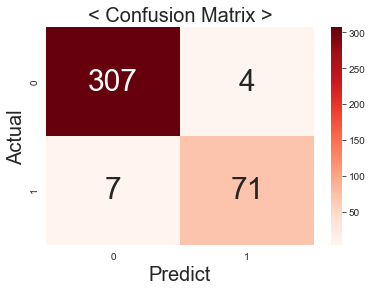


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       311
           1       0.95      0.91      0.93        78

    accuracy                           0.97       389
   macro avg       0.96      0.95      0.96       389
weighted avg       0.97      0.97      0.97       389


 Accuracy: 0.9717223650385605

최적화된 모델의 예측 결과 정확도는 약 97.0% 이다.

In [154]:
get_eval(GSDT)

**변수 중요도 함수 설정**

In [155]:
def feature_importances(model):
    import plotly.graph_objs as go
    import plotly.offline as py
    trace = go.Scatter(
        y = model.feature_importances_,
        x = features,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 13,
            #size= model.feature_importances_,
            #color = np.random.randn(500), #set color equal to a variable
            color = model.feature_importances_,
            colorscale='Portland',
            showscale=True
        ),
        text = features
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        hovermode= 'closest',
         xaxis= dict(
             ticklen= 5,
             showgrid=False,
            zeroline=False,
            showline=False
         ),
        yaxis=dict(
            title= 'Feature Importance',
            showgrid=False,
            zeroline=False,
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='scatter2010')

**feature importance가 결정되는 의사결정 나무의 분석과정 시각화**

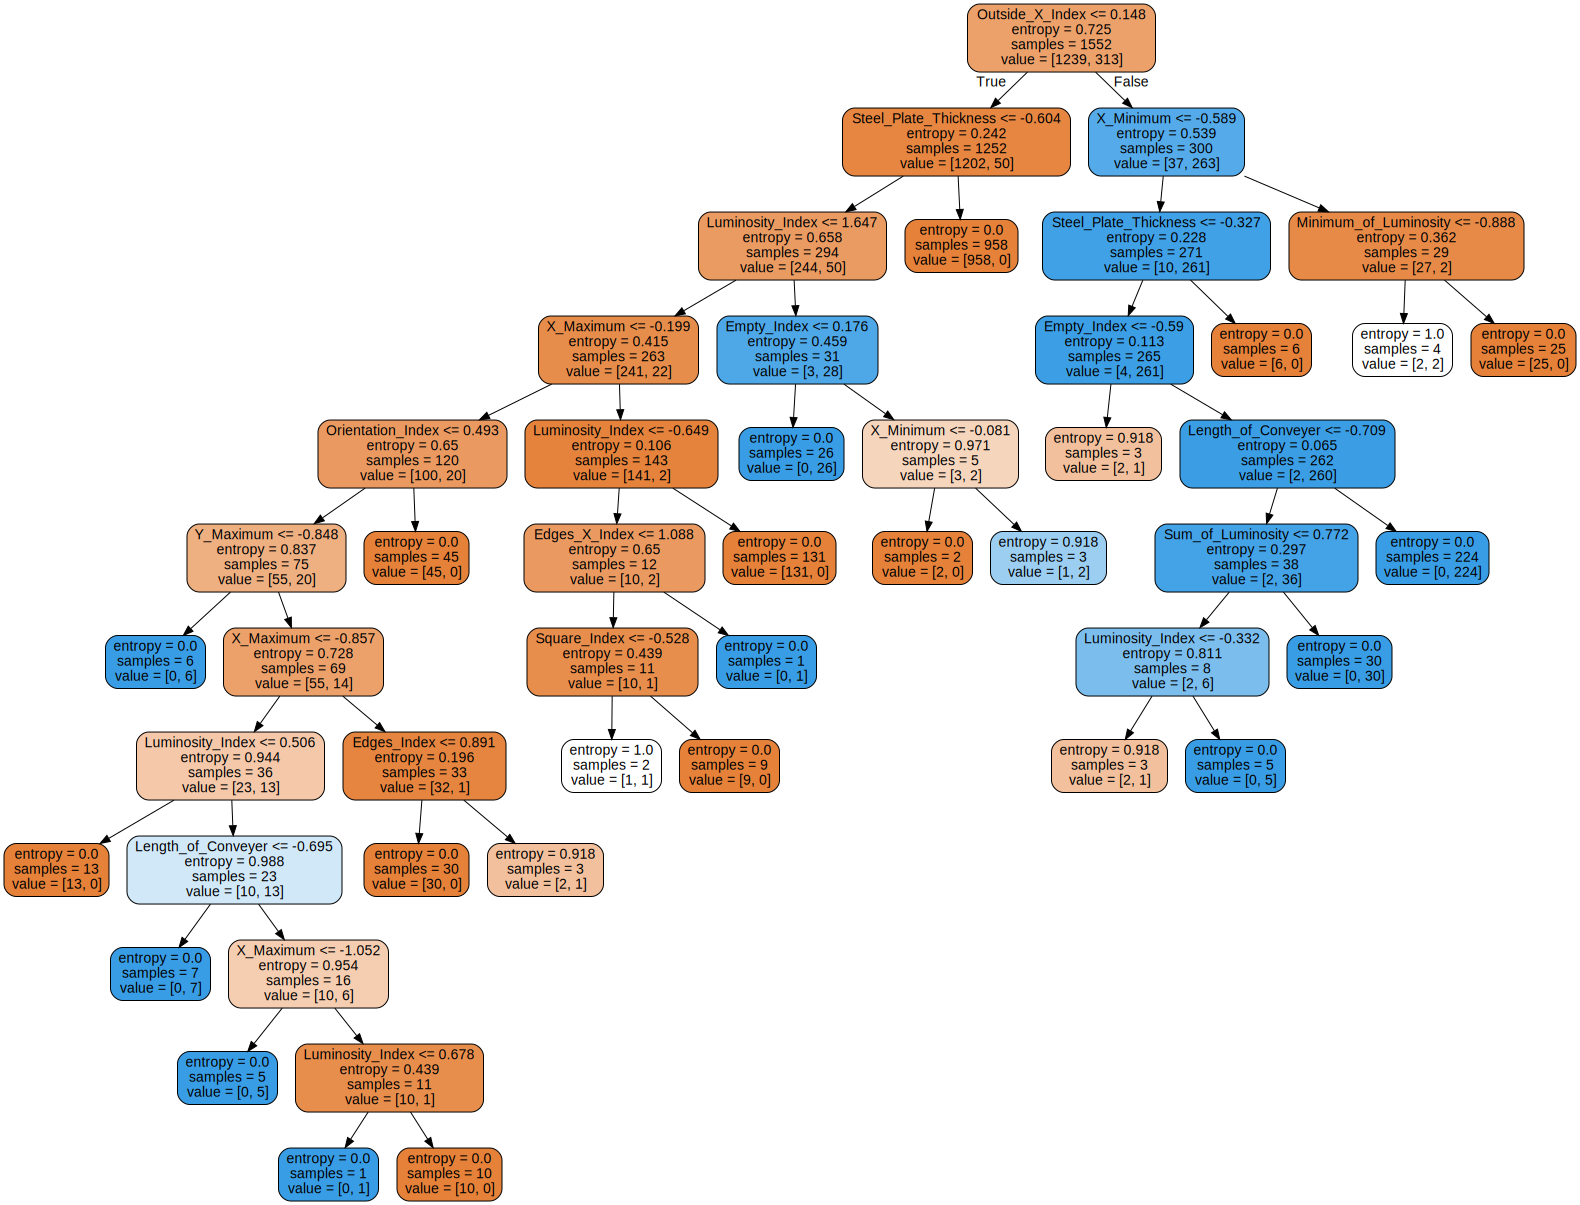

In [156]:
# 트리 시각화
from sklearn import tree
import graphviz
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=1,min_samples_split=5)
dt2.fit(x_train,y_train)
dot_data=tree.export_graphviz(dt2,feature_names=x_train.columns,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

- 붉은색에 가까울 수록 1에 비해서 0이 많은 것
- 파란색에 가까울 수록 0에 비해서 1이 많은 것
---
[모델 학습 과정 설명]
- 1번째 노드는 전체 샘플(1552개)을 갖고 있다. 그 중 1은 1239개, 0은 313개를 갖고 있다.
- 이 첫번째 노드에서 Outside_X_Index 라는 feature가 0.148 보다 작거나 같다는 조건을 만족하면 True쪽 가지로 이동, 아니면 Fals쪽 가지로로 이동
- 2번째 노드를 보면 왼쪽으로 1252개의 samples가 이동(1은 1202개, 0은 50개), 오른쪽엔 300개의 samples가 이동 (1이 37개, 0이 263개)
- 즉, 1은 오른쪽으로 몰아주고, 0은 왼쪽으로 몰아준 것 이다.
- 이것이 가능한 이유는 Outside_X_Index라는 feature이 0과 1을 잘 구분할 수 있는 변수이기 때문이다. (가장 먼저 선택된 이유이기도 함)
---
- 이처럼 새로운 조건을 계속 부여하면서 True / False로 필터링 된다.
- 최종적으로는 1만 남거나, 0만 남는 samples가 모인 노드가 생성되고 마무리 된다.
- 이때 너무 많은 가지가 생기면 과적합이 될 수 있다. 이것을 min_samples_split, min_samples_leaf, max_depth, max_features 등의 파라미터로 조정하는 것이다.

## Random Forest

- Random Forest는 아래의 Bagging과 Drop-out을 활용해 의사결정나무의 변동성을 완화하면서 예측력을 높인 모델
 - Bootstrapping: 복원추출을 통하여 샘플 구성이 조금씩 다른 여러 데이터셋을 생성
 - Aggregating: 여러 모형의 결과를 통합하여 모형의 변동성을 낮춤
 - Drop-out: Tree를 구성할 때 변수를 일부 탈락시킴. Tree간의 correlation을 감소시켜 이 또한 모형의 변동성을 낮춤

### Random Forest 기본 모형 생성

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf=RandomForestClassifier()

### Grid Search 구축 (Loss function / Prunning / 변수 선택 / Tree 개수)

In [159]:
#Random Forest에서 고려해야할 parameter : n_estimators, min_samples_split, max_depth, min_samples_leaf, max_features 등

# n_estimators : 랜덤 포레스트에서의 트리 개수. 값이 클 수록 성능이 좋아지지만 한계치가 있고, 학습 시간이 증가한다.
# min_samples_split : node 분할하기 위한 최소한의 샘플 수, 작게 설정할 수록 과적합 가능성 up(노드가 너무 많아져서)
# min_samples_leaf : 말단 node(leaf)가 되는 최소한의 샘플 수, min_samples_split 처럼 과적합 제어 용도, 비대칭적 자료는 값을 작게 하는 것이 좋다.
# max_depth : 트리의 최대 깊이 , 깊어질수록 min_samples_split 설정대로 최대분할 하여 과적합 가능성 높아짐
# max_features : 최적의 분할을 위해 고려할 feature의 개수 , sqrt는 전체 feature 개수를 루트한 값, log2는 로그를 씌운 값을 의미

parameters={'n_estimators':[50,100],'criterion':['gini','entropy'],'min_samples_split':[2,5],
            'max_depth':[None,2],'min_samples_leaf':[1,3,10],'max_features':['sqrt']}

GSRF=GridSearchCV(rf,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GSRF.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [160]:
get_best_parms(GSRF)

best params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best score 0.9851695616211744


- 랜덤 포레스트 모델의 트리 개수(n_estimator)는 100개 이다.
- entrypy 로 분할된 tree의 품질을 측정해야 한다.
- 트리의 최대 깊이(max_depth)는 None으로 완벽하게 분류를 해낼때까지 깊이를 계속 키우는 것을 의미
- 최적 분할을 위한 feature의 수(max_features) 는 sqrt로 데이터 셋의 모든 feature수에 루트를 씌운값 만큼 사용했다.
- 말단 node가 되는 최소한의 샘플 수 (min_samples_leaf)는 1이다.
- node 분할을 위한 최소한의 샘플 수 (min_samples_split)는 2로 데이터 2개당 하나의 node가 형성 되었다.
---

- **위의 파라미터를 적용해서 랜덤 포레스트로 분류모델을 수행한 결과의 정확도는 약 98%이다.**

### 모형 평가 및 최적  Random Forest 구축

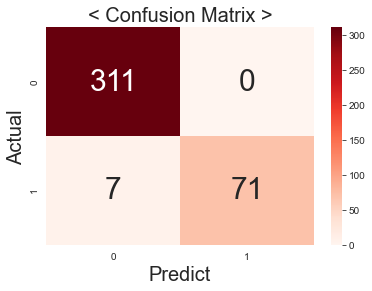


               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.91      0.95        78

    accuracy                           0.98       389
   macro avg       0.99      0.96      0.97       389
weighted avg       0.98      0.98      0.98       389


 Accuracy: 0.9820051413881749

최적화된 모델의 예측 결과 정확도는 약 98.0% 이다.

In [161]:
get_eval(GSRF)

---
## 3가지 분류 모델 정리

- 로지스틱 회귀분석은 complexicity를 충분히 확보되있지 못해서 모형 자체에 한계가 있다 => 예측성능이 떨어질 수 있다.
- 의사결정 나무는 모형의 복잡도를 많이 올려서 complexicity를 충분히 확보할 수 있지만(예측성능 up), test에서는 예측력이 많이 낮아질 숭 있다. (모형의 변동성:분산값 이 크기 때문)
- 랜덤 포레스트는 의사결정 나무의 이러한 단점을 보완(bagging, drop-out)해서 test 에서 의 예측 성능을 높일 수 있었다.
- 하지만 랜덤 포레스트는 결과에 대한 해석을 명확히 하기 어렵다는 단점이 있다.
- 모델 내의 의사결정나무 모델을 통해 얻은 결론이 n_estimator만큼 있고 그 결과를 종합해서 나온 결과이기 때문에 명확하게 특정 원인을 설명 하기가 어렵다.

---
- Feature Importance로 랜덤 포레스트의 부족한 설명력을 다소 보충할 수 있다.
- 하지만 연속형 변수 혹은 카테고리 개수가 매우많은 변수(high cardinality) 한 데이터의 경우 feature importance가 부풀려질 가능성이 있다. (CARDINAL NUMBER : 집합의 수) 
---
**Feature Importance** scatter plot형태로 시각화

In [162]:
rf = RandomForestClassifier( max_depth= None,min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
rf.fit(x_train, y_train)
features = x_train.columns.values

In [163]:
feature_importances(rf)

## Support Vector Machine

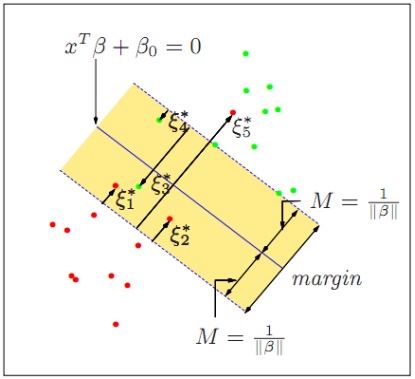

- 초록점과 빨간점을 하나의 선을 그어서 **최대한** 구분하고자 하는 것이 SVM
- SVM은 노란색 margin을 최대화하는 boundary를 찾는 것이 목표.
- 즉, **가장 폭이 넓은 boundary를 찾는 것**이 목적인 모델
---
- 원칙적으론 점이 닿지 않는 가장 극단에 위치한 margine이 최대 boundary 이다.
- 하지만 실제 데이터는 그림처럼 boundary 안에 데이터가 존재할 수도 있다. (이상치 등)
- 이때 SVM이 분류를 하는 방법은 Error를 허용하는 것이다.
- Error을 허용하는 정도를 C로 표현한다.
 - C가 크면 Error를 많이 허용하고, C가 작을 수록 Error를 적게 허용한다.
---
- 다만 이렇게 Error를 허용해도  직선으로 데이터가 분류되지 않는 경우가 있다.
- 이 경우에는 kernel 이란 하이퍼 파라미터를 사용해서 분류 한다.

### Support Vector Machine 기본 모형 생성

In [164]:
from sklearn import svm

In [165]:
svc=svm.SVC()

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Grid Search 구축 (Regularization / Kernel / Gamma)

- C : Error를 허용하는 정도 
- kernel
    - 하나의 직선으로 구분이 가능한 경우 = linear
    - 직선으로 분류할 수 없고, 곡선이나 원으로 구분해야 할때 = poly, rbf,sigmoid, precomputed
    - rbf : 가우시안 (정규분포)를 활용
- degree : polynomial kernel의 degree
- gamma : kernel의 모양이 얼마나 뾰족한지, 뭉퉁그려져 있는지 정도
    - rbf, poly, sigmoid 와 연관
    - rbf : 분산의 term
    
- 즉, 데이터가 선형관계라면 C값을 조정, 비선형 관계라면 kernel , degree, gamma를 조정한다.

In [166]:
parameters={'C':[0.01,0.1,0.5,0.9,1,5,10],'kernel':['linear','rbf','poly'],'gamma':[0.1,1,10]}
GS_SVM=GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_SVM.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=12,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [167]:
get_best_parms(GS_SVM)

best params {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
best score 0.9826137303556658


### 모형 평가 및 최적 Support Vector Machine 구축

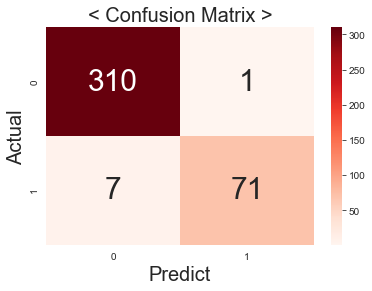


               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       0.99      0.91      0.95        78

    accuracy                           0.98       389
   macro avg       0.98      0.95      0.97       389
weighted avg       0.98      0.98      0.98       389


 Accuracy: 0.9794344473007712

최적화된 모델의 예측 결과 정확도는 약 98.0% 이다.

In [168]:
get_eval(GS_SVM)

- Random Forest(0.984)보다는 성능이 다소 떨어졌지만, Logistic Regression(0.969) 보다는 좋은 성능을 보이고 있다.
---

## 신경망 모형

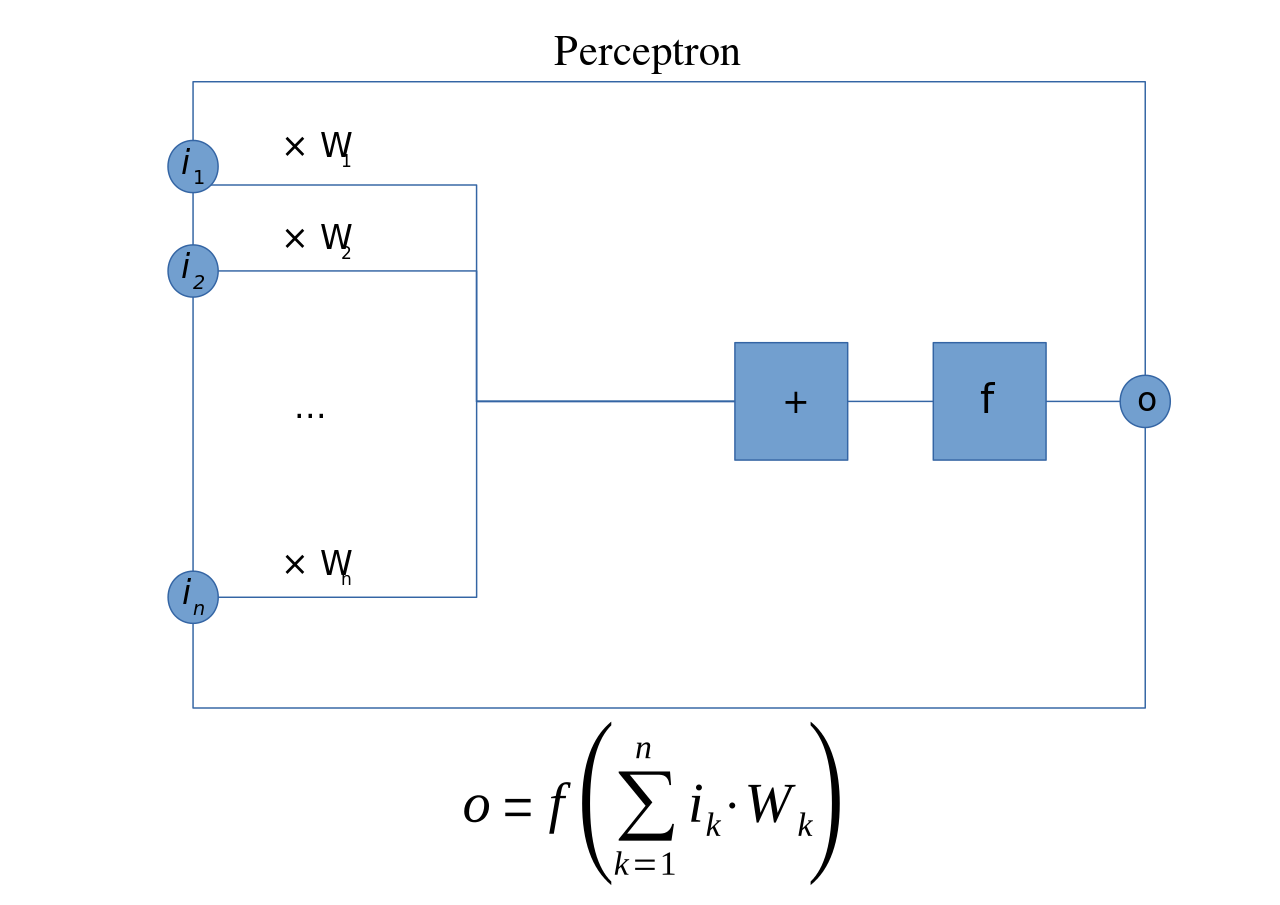

(Image reference: https://en.wikipedia.org/wiki/File:Perceptron.svg)

- 신경망 모형은 입력 데이터를 종합하여 결과값을 내는 구조를 가진 Perceptron을 중첩시키고 혼합시킨 구조를 말한다. 구조는 2부분으로 나눌 수 있다.
 - 입력값들의 선형합 구조인 transfer function
 - activation function f()
--- 
- 이 때 입력값은 다른 perceptron의 출력값이 될 수 있으며 이것이 중첩되면 아래와 같이 나타날 수 있으며 이를 신경망 모형이라 한다.
 - Input Layer: 입력 데이터가 위치하는 layer (입력 데이터가 모여있는 곳).
 - Hidden Layer: 입력 데이터 혹은 또 다른 hidden layer의 출력값을 입력값으로 하는 perceptron이 위치하는 layer. Hidden Layer은 다수 일 수 있다.
 - Output Layer:마지막 hidden layer의 출력값을 입력된 값, 출력함수의 결과를 얻은 노드로 구성된 layer.

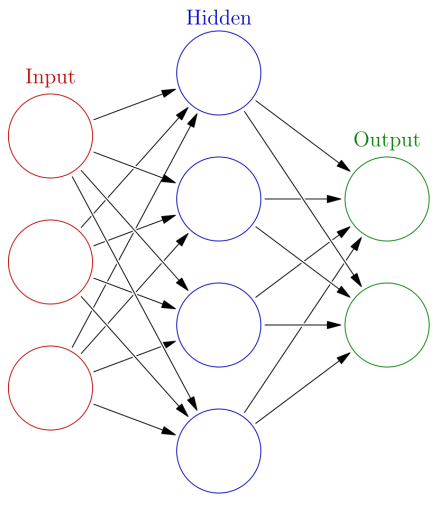

### 신경망 모형  기본 모형 생성

In [169]:
from sklearn.neural_network import MLPClassifier

In [170]:
neuron_model=MLPClassifier(random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPdefect_typeifier.html

### Grid Search 구축 (Hidden Layer 수 / Hidden node 수 / Regularization)

- hidden_layer_sizes : hidden layer의 node 수만 따로 설정
    - 히든레이어는 대체로 1개로도 충분함.
    - 데이터는 크지 않은데 2이상으로 설정한 경우 모델 복잡성이 증가해 local minima/maxima 에 빠질 가능성 높음)
    - 히든 노드의 수는 아래와 같은 가이드라인 또한 존재하나, grid search를 통해서 찾는 것이 유용하다.

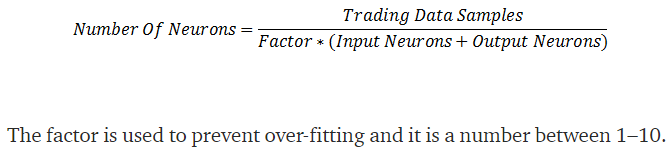

- activation : 결과값을 출력할때 어떤 function을 사용할 것인지.
- solver : 모델을 학습시키는 방법/알고리즘
    - adam : 일반적으로 가장 보편적으로 사용
    - lbfgs : 데이터가 크지 않을때 adam보다 성능이 좋다.
    - adam을 사용하는데 결과값이 잘 나오지 않는다면 beta_1, beta_2 파라미터를 조정할 수 있다.
- alpha : 모델의 복잡도를 조정 
    - 값이 작을수록 모델이 복잡해진다.

**Hidden layer 적정 수 계산**

In [171]:
x_train.shape

(1552, 26)

In [172]:
1552/(10*(26+1))

5.7481481481481485

In [173]:
1552/(1*(26+1))

57.48148148148148

In [174]:
parameters={'alpha':[1e-3,1e-1,1e1],'hidden_layer_sizes':[(5),(30),(60)],'activation':['tanh','relu'],'solver':['adam','lbfgs']}
GS_NN=GridSearchCV(neuron_model,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_NN.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=12,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.1, 10.0],
                         'hidden_layer_sizes': [5, 30, 60],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy')

In [175]:
get_best_parms(GS_NN)

best params {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
best score 0.9793796526054592


In [176]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.970 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.972 (+/-0.030) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.022) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.974 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.977 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
0.975 (+/-0.023) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.969 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.973 (+/-0.030) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.974 (+/-0.021) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.979 (+/-0.026) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

- 실제 학습 과정을 살펴 보면 adam보다는 lbfgs가 값이 더 안정적이다.
    - 동일 파라미터에서 0.95가 나오는 경우는 adam이 있다.
    - alpha값이 더 커지면 lbfgs가 adam보다 더 나은 결과를 보여준다.
- 두 solver 간에 큰 차이는 없지만 adam이 lbfgs보다는 값이 흔들리는 경우가 생기므로 lbgfs가 더 나은 solver로 선택되는 것이 합리적이다.
---
- activation 은 tanh 일때가 결과가 더 좋다.
- alpha 는 0.1일때의 결과가 가장 좋다.

**좁혀진 값을 기준으로 재검정**

In [177]:
parameters2={'alpha':[1e-1],'hidden_layer_sizes':[(5),(10),(20),(30)],'activation':['tanh'],'solver':['lbfgs']}
GS_NN2=GridSearchCV(neuron_model, parameters2, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_NN2.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=12,
             param_grid={'activation': ['tanh'], 'alpha': [0.1],
                         'hidden_layer_sizes': [5, 10, 20, 30],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [178]:
get_best_parms(GS_NN2)

best params {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
best score 0.9793796526054592


### 모형 평가 및 최적 신경망 모형 구축

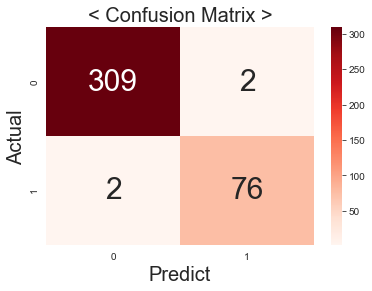


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       311
           1       0.97      0.97      0.97        78

    accuracy                           0.99       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.99      0.99      0.99       389


 Accuracy: 0.9897172236503856

최적화된 모델의 예측 결과 정확도는 약 99.0% 이다.

In [179]:
get_eval(GS_NN2)

https://playground.tensorflow.org

## Boosting

- 오분류된 데이터에 가중치를 더 주어 샘플링하여 이를 잘 분류하기 위한 합성 분류기를 구성하는 방법

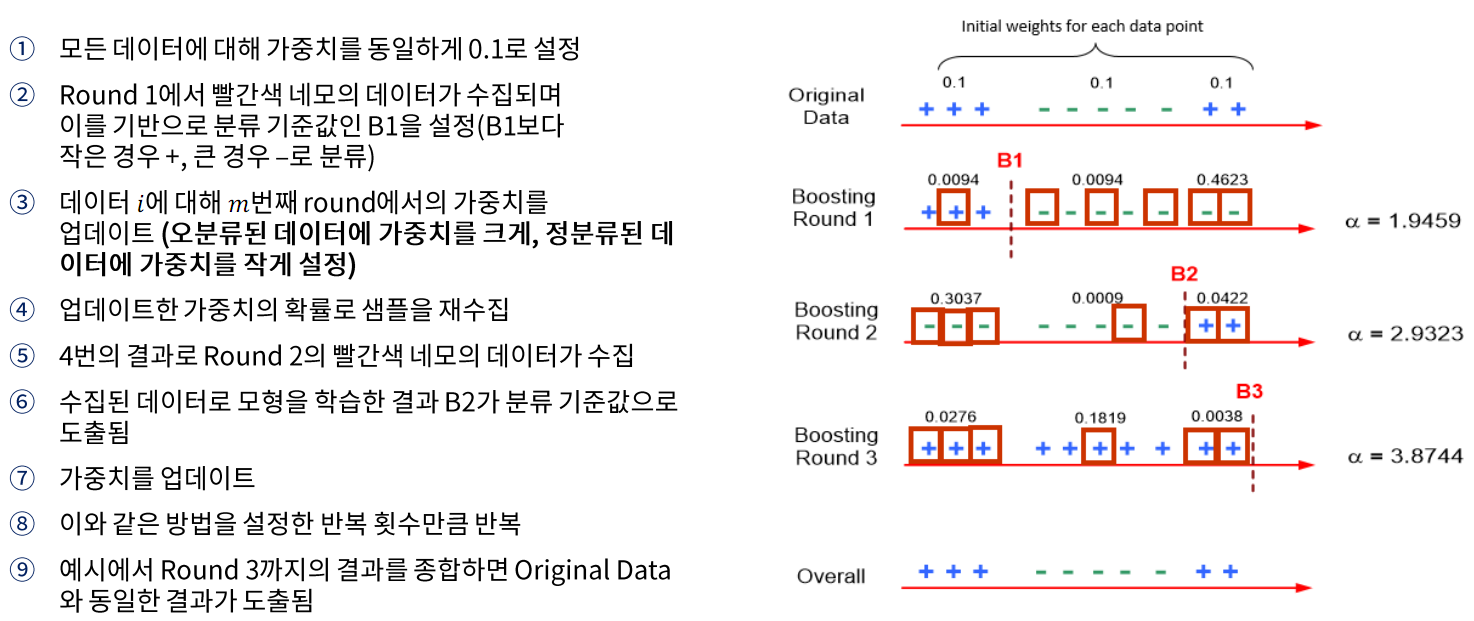

### xgboost 기본 모형 생성

- xgboost는 기본적인 gradient boosting에 과정합을 방지하기 위한 regularization term이 추가된 형태.

In [180]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [181]:
xgb_model=xgb.XGBClassifier(objective='binary:logistic')

https://xgboost.readthedocs.io/en/latest/parameter.html

### xgboost Grid Search 구축 (Max depth / Tree 개수/ Gamma)

In [182]:
parameters={
    'max_depth':[5,8],
    'min_child_weight':[1,5],
    'gamma':[0,1],
    'colsample_bytree':[0.8,1],
    'colsample_bylevel':[0.9,1],
    'n_estimators':[50,100]
}


In [183]:
GS_xgb=GridSearchCV(xgb_model, param_grid=parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GS_xgb.fit(x_train,y_train)

[17:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [184]:
get_best_parms(GS_xgb)

best params {'colsample_bylevel': 1, 'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50}
best score 0.9864722911497106


In [185]:
parameters2={
    'max_depth':[3,5,7],
    'min_child_weight':[1],
    'gamma':[0],
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'n_estimators':[100,150]
}

GS_xgb2=GridSearchCV(xgb_model,param_grid=parameters2,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_xgb2.fit(x_train,y_train)

[17:42:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [186]:
get_best_parms(GS_xgb2)

best params {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
best score 0.9864681555004136


### 모형 평가 및 최적 xgboost 모형 구축

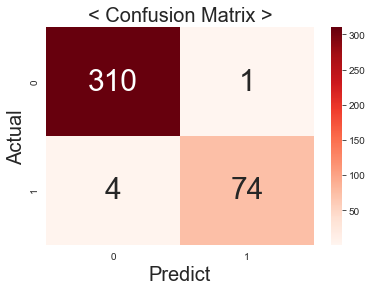


               precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       0.99      0.95      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389


 Accuracy: 0.987146529562982

최적화된 모델의 예측 결과 정확도는 약 99.0% 이다.

In [187]:
get_eval(GS_xgb2)

### lightGBM 기본 모형 생성

- xgboost에 비교할 때 성능은 비슷함.
- leaf-wise loss를 사용함. 
  - 시간과 메모리를 절약하여, fitting 속도 빠름.
  - 데이터의 수가 충분하지 않다면 과적합의 위험이 좀 더 높음.

In [188]:
import lightgbm as lgb

In [189]:
lgbm_model=lgb.LGBMClassifier(objecve='binary')

https://lightgbm.readthedocs.io/en/latest/Parameters.html

### lightGBM  Grid Search 구축 (Max depth / Tree 개수)

In [190]:
parameters={
    'num_leaves':[32,64,128],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[100,150]
}

In [191]:
GS_lgbm=GridSearchCV(lgbm_model,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_lgbm.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: objecve
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


GridSearchCV(cv=10, estimator=LGBMClassifier(objecve='binary'), n_jobs=12,
             param_grid={'colsample_bytree': [0.8, 1],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [100, 150],
                         'num_leaves': [32, 64, 128]},
             scoring='accuracy')

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [192]:
get_best_parms(GS_lgbm)

best params {'colsample_bytree': 0.8, 'min_data_in_leaf': 10, 'n_estimators': 100, 'num_leaves': 32}
best score 0.9864681555004136


### 모형 평가 및 최적 lightGBM 모형 구축

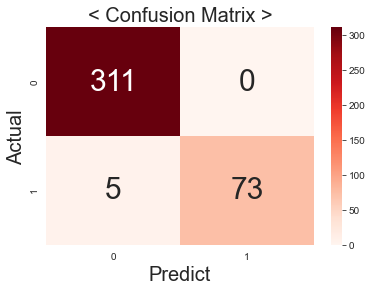


               precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.94      0.97        78

    accuracy                           0.99       389
   macro avg       0.99      0.97      0.98       389
weighted avg       0.99      0.99      0.99       389


 Accuracy: 0.987146529562982

최적화된 모델의 예측 결과 정확도는 약 99.0% 이다.

In [193]:
get_eval(GS_lgbm)